<a href="https://colab.research.google.com/github/manasik29/KNearestNeighbors/blob/main/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
names = ('Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class')
df = pd.read_csv('/content/pima-indians-diabetes.data.csv', names=names)
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
array=df.values
x = array[:, 0:8]
y = array[:, 8]

In [5]:
num_folds =10
kfold = KFold(n_splits=num_folds)

model=KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, x, y, cv=kfold)


print(results.mean())

0.7565276828434724


**Grid Search for Algorithm Tuning**

In [12]:
#to get best k values
import numpy as np
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))               #get accuracy scores for 1<=k<=40, and select the one with highest accuracy.
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=kfold)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.7604237867395763
{'n_neighbors': 18}


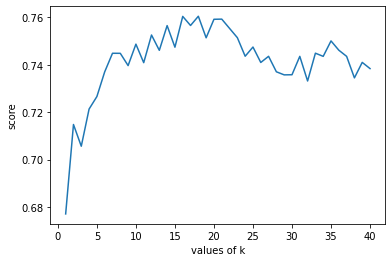

In [11]:
#Visual Representation
import matplotlib.pyplot as plt
#get scores for k between 1 to 41
k_range=range(1,41)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=kfold)
  k_score.append(scores.mean())
#plot score to k
plt.plot(k_range, k_score)  
plt.xlabel("values of k")
plt.ylabel("score")
plt.show()